In [1]:
!unzip '/content/drive/MyDrive/DataSets/Birds.zip'

Archive:  /content/drive/MyDrive/DataSets/Birds.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: 

In [ ]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=(1./255), horizontal_flip=True, shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255),)  #--> (0 to 255) convert to (0 to 1)

In [ ]:
train = train_gen.flow_from_directory('/content/train_data/train_data', target_size=(120, 120), class_mode='categorical', batch_size=8)
test = test_gen.flow_from_directory('/content/test_data/test_data', target_size=(120, 120), class_mode='categorical', batch_size=8)     

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
# CNN
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(20, (3, 3), activation='relu', input_shape=(120, 120, 3)))#Number of filters or output channels in the layer=20, matrix size, 120x120 with 3 colors
model.add(MaxPooling2D(pool_size=(2, 2)))#matrix size
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(16, activation='softmax'))#no. of classes is 16

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train, batch_size=8, validation_data=test, epochs=10)

Epoch 1/10
19/19 [==============================] - 133s 7s/step - loss: 5.9212 - accuracy: 0.0467 - val_loss: 3.1762 - val_accuracy: 0.0828
Epoch 2/10
19/19 [==============================] - 127s 7s/step - loss: 2.7604 - accuracy: 0.0933 - val_loss: 2.7574 - val_accuracy: 0.0892
Epoch 3/10
19/19 [==============================] - 127s 7s/step - loss: 2.6838 - accuracy: 0.1800 - val_loss: 2.6888 - val_accuracy: 0.1338
Epoch 4/10
19/19 [==============================] - 127s 7s/step - loss: 2.5795 - accuracy: 0.1867 - val_loss: 2.6778 - val_accuracy: 0.1592
Epoch 5/10
19/19 [==============================] - 105s 6s/step - loss: 2.5004 - accuracy: 0.2067 - val_loss: 2.6412 - val_accuracy: 0.1656
Epoch 6/10
19/19 [==============================] - 103s 6s/step - loss: 2.4577 - accuracy: 0.3067 - val_loss: 2.6607 - val_accuracy: 0.1911
Epoch 7/10
19/19 [==============================] - 127s 7s/step - loss: 2.1362 - accuracy: 0.3533 - val_loss: 3.0045 - val_accuracy: 0.2293
Epoch 8/10
19

In [ ]:
model.save('birdsWeighhts.h5')#saves the weights in tensorflow formate

In [ ]:
# Testing
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
# Testing 1
img1 = image.load_img('/content/himbulBird.jpg', target_size=(120, 120));
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)
pred1 = np.argmax(model.predict(img1))
output = ['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(f'Class: {pred1}, Predicted_Bird: {output[pred1]}')
# Testing 2
img2 = image.load_img('/content/lbicrwBird.jpeg', target_size=(120, 120));
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
pred2 = np.argmax(model.predict(img2))
print(f'Class: {pred2}, Predicted_Bird: {output[pred2]}')
# Testing 3
img3 = image.load_img('/content/boneglBird.jpg', target_size=(120, 120));
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3, axis=0)
pred3 = np.argmax(model.predict(img3))
print(f'Class: {pred3}, Predicted_Bird: {output[pred3]}')
# Testing 4
img4 = image.load_img('/content/jglowlBird.jpeg', target_size=(120, 120));
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4, axis=0)
pred4 = np.argmax(model.predict(img4))
print(f'Class: {pred4}, Predicted_Bird: {output[pred4]}')

1/1 [==============================] - 0s 29ms/step
Class: 7, Predicted_Bird: himbul
1/1 [==============================] - 0s 28ms/step
Class: 7, Predicted_Bird: himbul
1/1 [==============================] - 0s 27ms/step
Class: 0, Predicted_Bird: blasti
1/1 [==============================] - 0s 27ms/step
Class: 7, Predicted_Bird: himbul


# Model tuning (Adding feature extraction layers, dropout, batch normalization & early stopping)

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout
model = Sequential()
model.add(Convolution2D(20, (3, 3), activation='relu', input_shape=(120, 120, 3)))
model.add(BatchNormalization()) # Normalizing the conv layer output
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2)) # Dropping the unwanted 20% of data
model.add(Convolution2D(40, (3, 3), activation='relu'))#double the filters
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Convolution2D(60, (3, 3), activation='relu'))#double the filters
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Convolution2D(80, (3, 3), activation='relu'))#double the filters
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(16, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 118, 118, 20)      560       
                                                                 
 batch_normalization_31 (Bat  (None, 118, 118, 20)     80        
 chNormalization)                                                
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 59, 59, 20)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 59, 59, 20)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 57, 57, 40)        7240      
                                                                 
 batch_normalization_32 (Bat  (None, 57, 57, 40)      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy', patience=8, restore_best_weights=True)

In [ ]:
model.fit(train, batch_size=8, validation_data=test, epochs=50, callbacks=early_stop) #increase epochs and early_stop

Epoch 1/50
19/19 [==============================] - 164s 9s/step - loss: 2.7579 - accuracy: 0.1733 - val_loss: 2.8027 - val_accuracy: 0.0382
Epoch 2/50
19/19 [==============================] - 131s 7s/step - loss: 2.4457 - accuracy: 0.2600 - val_loss: 2.8174 - val_accuracy: 0.0382
Epoch 3/50
19/19 [==============================] - 129s 7s/step - loss: 2.1628 - accuracy: 0.3200 - val_loss: 2.9311 - val_accuracy: 0.1210
Epoch 4/50
19/19 [==============================] - 132s 7s/step - loss: 2.0707 - accuracy: 0.3667 - val_loss: 2.9882 - val_accuracy: 0.0446
Epoch 5/50
19/19 [==============================] - 111s 6s/step - loss: 1.7880 - accuracy: 0.4533 - val_loss: 3.3158 - val_accuracy: 0.0382
Epoch 6/50
19/19 [==============================] - 131s 7s/step - loss: 1.8296 - accuracy: 0.4200 - val_loss: 3.2697 - val_accuracy: 0.0573
Epoch 7/50
19/19 [==============================] - 109s 6s/step - loss: 1.6133 - accuracy: 0.5000 - val_loss: 4.1428 - val_accuracy: 0.0955
Epoch 8/50
19

In [ ]:
model.save('updatedBirdsWeights.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

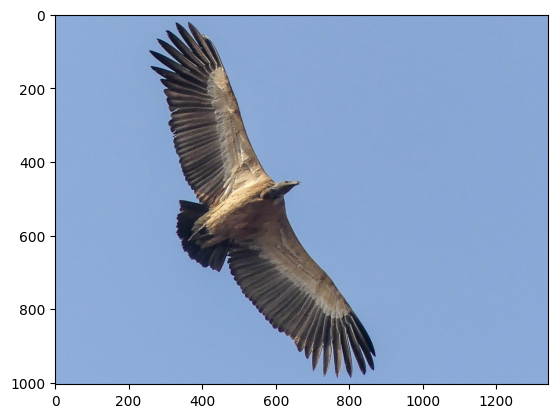

1/1 [==============================] - 0s 159ms/step
Class: 4, Predicted_Bird: cmnmyn


In [ ]:
# Testing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing import image

image1 = mpimg.imread('/content/himgriBird.jpeg')
plt.imshow(image1)
plt.show()
img = image.load_img('/content/himgriBird.jpeg', target_size=(120, 120));
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
pred = np.argmax(model.predict(img))
output = ['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(f'Class: {pred}, Predicted_Bird: {output[pred]}')


# Using Tranfer Models

In [14]:
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import pandas as pd
# Testing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image

In [3]:
# Data Augmentation
train_gen = ImageDataGenerator(rescale=(1./255), horizontal_flip=True, zoom_range=0.2, shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255),)  #--> (0 to 255) convert to (0 to 1)

In [39]:
train = train_gen.flow_from_directory('/content/train_data/train_data', target_size=(224, 224), class_mode='categorical', batch_size=22) #change sizes
test = test_gen.flow_from_directory('/content/test_data/test_data', target_size=(224, 224), class_mode='categorical', batch_size=22)  

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [5]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

# 1.) VGG16

In [40]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Adding the preprocessing layer to the front of vgg
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

In [41]:
# Train model with existing weights
for layer in vgg.layers:
  layer.trainable=False

In [42]:
# Flatten layer
f = Flatten()(vgg.output)

In [43]:
# Output layer
prediction = Dense(16, activation='softmax')(f) #16 outputs

In [44]:
# Create Vgg16 model
model = Model(inputs=vgg.input, outputs=prediction)

In [45]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
history = model.fit(train, validation_data=test, epochs=5, steps_per_epoch=len(train), validation_steps=len(test)) #add steps

Epoch 1/5
7/7 [==============================] - 140s 22s/step - loss: 3.5428 - accuracy: 0.2133 - val_loss: 2.9624 - val_accuracy: 0.1401
Epoch 2/5
7/7 [==============================] - 92s 14s/step - loss: 1.8567 - accuracy: 0.3667 - val_loss: 2.8137 - val_accuracy: 0.2866
Epoch 3/5
7/7 [==============================] - 90s 14s/step - loss: 0.8441 - accuracy: 0.7000 - val_loss: 2.8172 - val_accuracy: 0.3121
Epoch 4/5
7/7 [==============================] - 92s 14s/step - loss: 0.4570 - accuracy: 0.8800 - val_loss: 2.8450 - val_accuracy: 0.3376
Epoch 5/5
7/7 [==============================] - 91s 14s/step - loss: 0.3179 - accuracy: 0.9267 - val_loss: 2.9449 - val_accuracy: 0.3758


Minimum Validation Loss: 2.8137


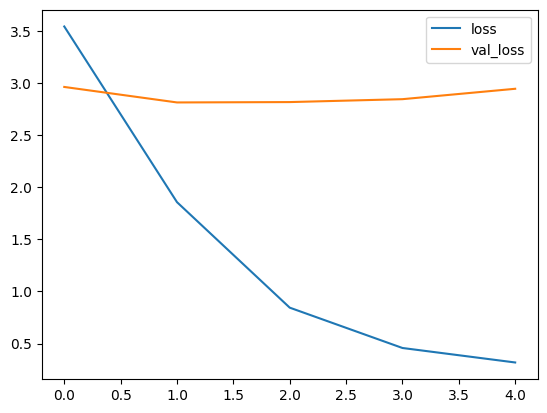

In [49]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

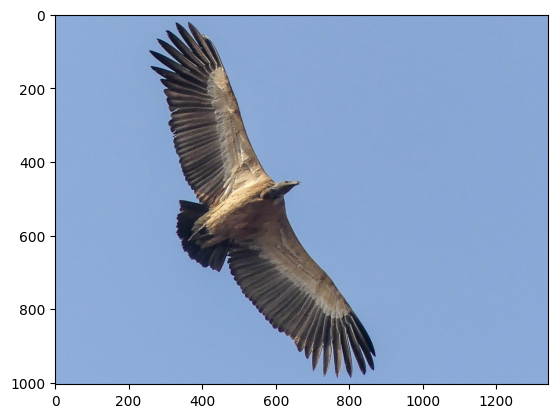

1/1 [==============================] - 0s 21ms/step
Class: 2, Predicted_Bird: brhkyt


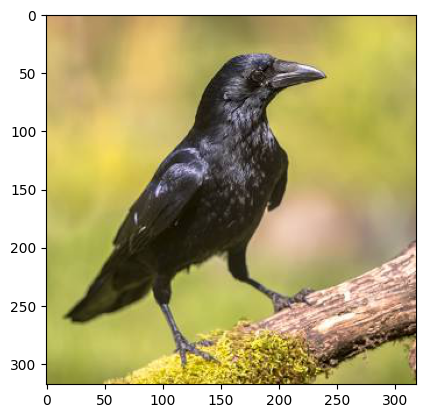

1/1 [==============================] - 0s 29ms/step
Class: 4, Predicted_Bird: cmnmyn


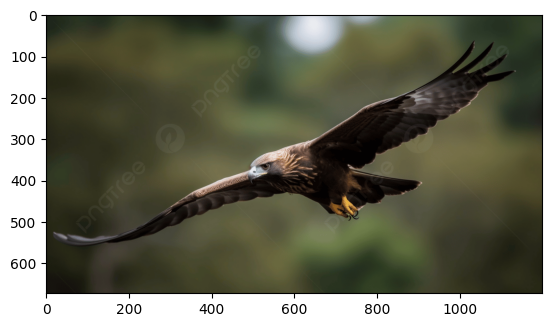

1/1 [==============================] - 0s 35ms/step
Class: 8, Predicted_Bird: himgri


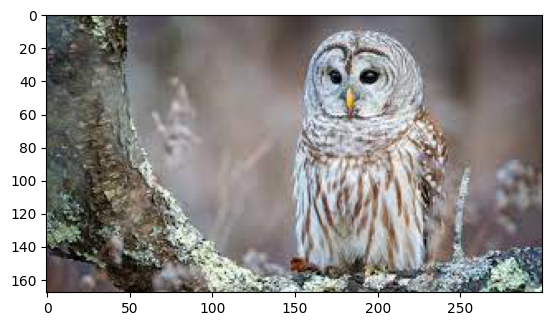

1/1 [==============================] - 0s 37ms/step
Class: 4, Predicted_Bird: cmnmyn


In [53]:
# Testing 1
image1 = mpimg.imread('/content/himgriBird.jpeg')
plt.imshow(image1)
plt.show()
img1 = image.load_img('/content/himgriBird.jpeg', target_size=(224, 224));
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)
pred1 = np.argmax(model.predict(img1))
output = ['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(f'Class: {pred1}, Predicted_Bird: {output[pred1]}')
# Testing 2
image2 = mpimg.imread('/content/lbicrwBird.jpeg')
plt.imshow(image2)
plt.show()
img2 = image.load_img('/content/lbicrwBird.jpeg', target_size=(224, 224));
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
pred2 = np.argmax(model.predict(img2))
print(f'Class: {pred2}, Predicted_Bird: {output[pred2]}')
# Testing 3
image3 = mpimg.imread('/content/boneglBird.jpg')
plt.imshow(image3)
plt.show()
img3 = image.load_img('/content/boneglBird.jpg', target_size=(224, 224));
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3, axis=0)
pred3 = np.argmax(model.predict(img3))
print(f'Class: {pred3}, Predicted_Bird: {output[pred3]}')
# Testing 4
image4 = mpimg.imread('/content/jglowlBird.jpeg')
plt.imshow(image4)
plt.show()
img4 = image.load_img('/content/jglowlBird.jpeg', target_size=(224, 224));
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4, axis=0)
pred4 = np.argmax(model.predict(img4))
print(f'Class: {pred4}, Predicted_Bird: {output[pred4]}')

# 2.) ResNet50

In [69]:
from tensorflow.keras.applications.resnet50 import ResNet50

# Adding the preprocessing layer to the front of ResNet50
resnet = ResNet50(include_top=False, input_shape=(224, 224, 3))

In [70]:
# Train model with existing weights
for layer in resnet.layers:
  layer.trainable=False

In [71]:
# Flatten layer
f = Flatten()(resnet.output)

In [72]:
# Output layer
out = Dense(16, activation='softmax')(f)

In [73]:
# Create ResNet50 model
res_model = Model(inputs=resnet.input, outputs=out)

In [74]:
res_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [75]:
res_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
history = res_model.fit(train, epochs=5, validation_data=test, steps_per_epoch=len(train), validation_steps=len(test)) #add steps

Epoch 1/5
7/7 [==============================] - 109s 16s/step - loss: 14.3748 - accuracy: 0.0667 - val_loss: 17.7557 - val_accuracy: 0.1083
Epoch 2/5
7/7 [==============================] - 92s 15s/step - loss: 16.0319 - accuracy: 0.1133 - val_loss: 15.7089 - val_accuracy: 0.0446
Epoch 3/5
7/7 [==============================] - 93s 14s/step - loss: 11.4655 - accuracy: 0.1400 - val_loss: 9.9655 - val_accuracy: 0.1338
Epoch 4/5
7/7 [==============================] - 90s 14s/step - loss: 7.2382 - accuracy: 0.2267 - val_loss: 6.7016 - val_accuracy: 0.1529
Epoch 5/5
7/7 [==============================] - 93s 14s/step - loss: 5.1481 - accuracy: 0.1933 - val_loss: 5.5010 - val_accuracy: 0.1465


Minimum Validation Loss: 5.5010


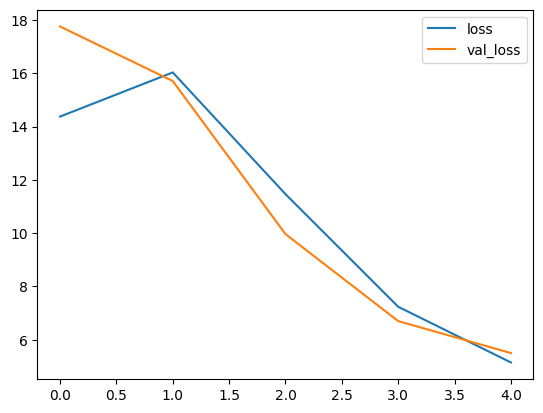

In [78]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

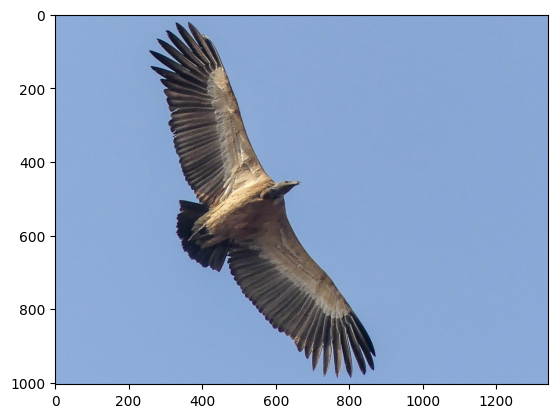

1/1 [==============================] - 18s 18s/step
Class: 4, Predicted_Bird: cmnmyn


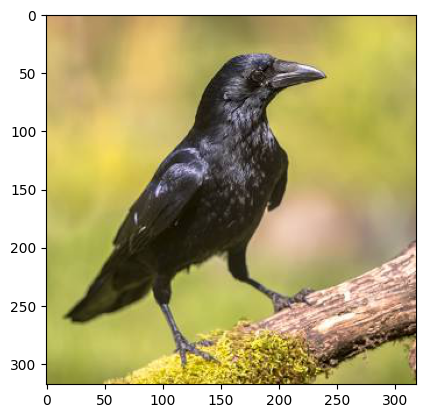

1/1 [==============================] - 0s 42ms/step
Class: 4, Predicted_Bird: cmnmyn


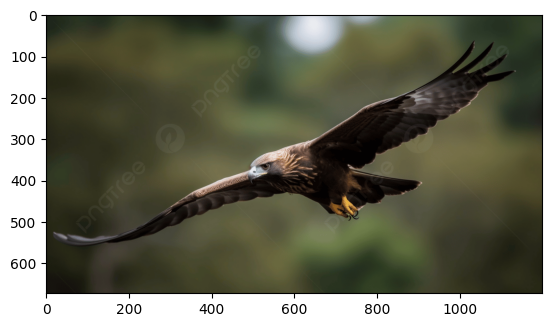

1/1 [==============================] - 0s 59ms/step
Class: 4, Predicted_Bird: cmnmyn


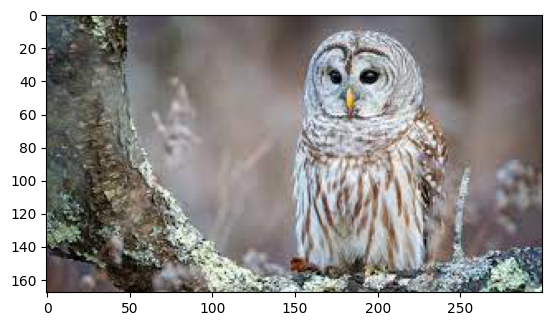

1/1 [==============================] - 0s 40ms/step
Class: 4, Predicted_Bird: cmnmyn


In [77]:
# Testing 1
image1 = mpimg.imread('/content/himgriBird.jpeg')
plt.imshow(image1)
plt.show()
img1 = image.load_img('/content/himgriBird.jpeg', target_size=(224, 224));
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)
pred1 = np.argmax(res_model.predict(img1))
output = ['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(f'Class: {pred1}, Predicted_Bird: {output[pred1]}')
# Testing 2
image2 = mpimg.imread('/content/lbicrwBird.jpeg')
plt.imshow(image2)
plt.show()
img2 = image.load_img('/content/lbicrwBird.jpeg', target_size=(224, 224));
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
pred2 = np.argmax(res_model.predict(img2))
print(f'Class: {pred2}, Predicted_Bird: {output[pred2]}')
# Testing 3
image3 = mpimg.imread('/content/boneglBird.jpg')
plt.imshow(image3)
plt.show()
img3 = image.load_img('/content/boneglBird.jpg', target_size=(224, 224));
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3, axis=0)
pred3 = np.argmax(res_model.predict(img3))
print(f'Class: {pred3}, Predicted_Bird: {output[pred3]}')
# Testing 4
image4 = mpimg.imread('/content/jglowlBird.jpeg')
plt.imshow(image4)
plt.show()
img4 = image.load_img('/content/jglowlBird.jpeg', target_size=(224, 224));
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4, axis=0)
pred4 = np.argmax(res_model.predict(img4))
print(f'Class: {pred4}, Predicted_Bird: {output[pred4]}')

# 3.) Inseption

In [79]:
from tensorflow.keras.applications import InceptionV3

# Adding the preprocessing layer to the front of InceptionV3
inception = InceptionV3(include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 5s 0us/step


In [80]:
# Train model with existing weights
for layer in inception.layers:
  layer.trainable=False

In [81]:
# Flatten layer
f = Flatten()(inception.output)

In [82]:
# Output layer
out = Dense(16, activation='softmax')(f)

In [83]:
# Create ResNet50 model
inception_model = Model(inputs=inception.input, outputs=out)

In [84]:
inception_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [85]:
inception_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
history = inception_model.fit(train, epochs=5, validation_data=test, steps_per_epoch=len(train), validation_steps=len(test)) #add steps

Epoch 1/5
7/7 [==============================] - 118s 18s/step - loss: 13.7444 - accuracy: 0.1867 - val_loss: 9.5855 - val_accuracy: 0.2994
Epoch 2/5
7/7 [==============================] - 93s 14s/step - loss: 4.0802 - accuracy: 0.6133 - val_loss: 9.2968 - val_accuracy: 0.3439
Epoch 3/5
7/7 [==============================] - 94s 14s/step - loss: 1.1962 - accuracy: 0.8400 - val_loss: 11.3254 - val_accuracy: 0.4076
Epoch 4/5
7/7 [==============================] - 94s 15s/step - loss: 1.0409 - accuracy: 0.8533 - val_loss: 14.7763 - val_accuracy: 0.3503
Epoch 5/5
7/7 [==============================] - 123s 20s/step - loss: 0.4724 - accuracy: 0.9267 - val_loss: 12.1073 - val_accuracy: 0.4331


Minimum Validation Loss: 9.2968


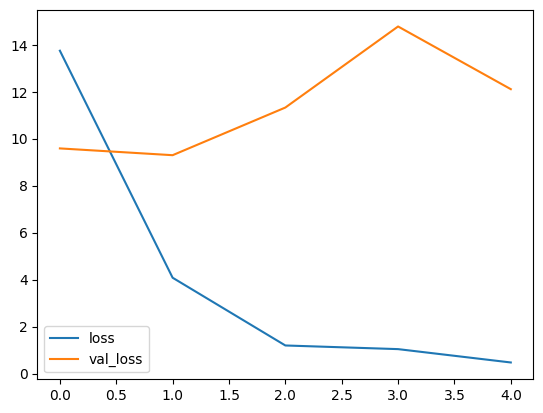

In [88]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

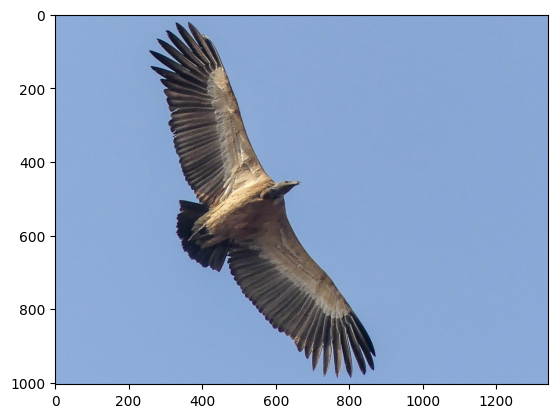

1/1 [==============================] - 2s 2s/step
Class: 11, Predicted_Bird: jglowl


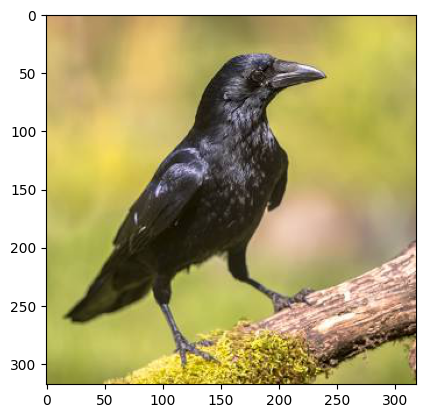

1/1 [==============================] - 0s 29ms/step
Class: 11, Predicted_Bird: jglowl


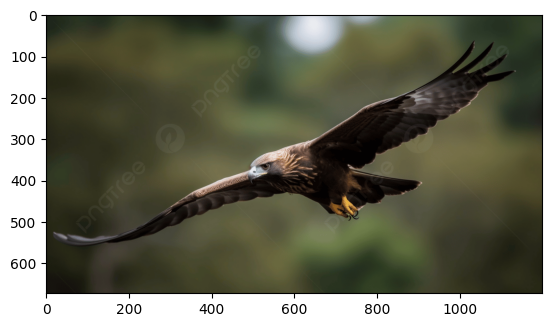

1/1 [==============================] - 0s 47ms/step
Class: 11, Predicted_Bird: jglowl


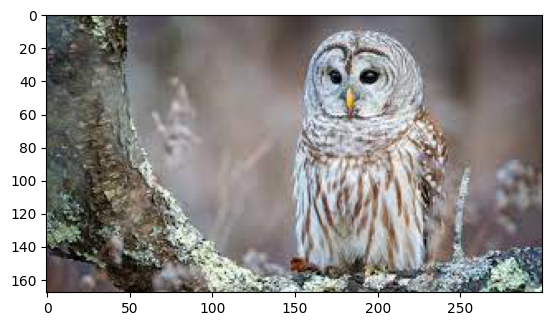

1/1 [==============================] - 0s 36ms/step
Class: 11, Predicted_Bird: jglowl


In [87]:
# Testing 1
image1 = mpimg.imread('/content/himgriBird.jpeg')
plt.imshow(image1)
plt.show()
img1 = image.load_img('/content/himgriBird.jpeg', target_size=(224, 224));
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)
pred1 = np.argmax(inception_model.predict(img1))
output = ['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(f'Class: {pred1}, Predicted_Bird: {output[pred1]}')
# Testing 2
image2 = mpimg.imread('/content/lbicrwBird.jpeg')
plt.imshow(image2)
plt.show()
img2 = image.load_img('/content/lbicrwBird.jpeg', target_size=(224, 224));
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
pred2 = np.argmax(inception_model.predict(img2))
print(f'Class: {pred2}, Predicted_Bird: {output[pred2]}')
# Testing 3
image3 = mpimg.imread('/content/boneglBird.jpg')
plt.imshow(image3)
plt.show()
img3 = image.load_img('/content/boneglBird.jpg', target_size=(224, 224));
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3, axis=0)
pred3 = np.argmax(inception_model.predict(img3))
print(f'Class: {pred3}, Predicted_Bird: {output[pred3]}')
# Testing 4
image4 = mpimg.imread('/content/jglowlBird.jpeg')
plt.imshow(image4)
plt.show()
img4 = image.load_img('/content/jglowlBird.jpeg', target_size=(224, 224));
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4, axis=0)
pred4 = np.argmax(inception_model.predict(img4))
print(f'Class: {pred4}, Predicted_Bird: {output[pred4]}')

# 4.) Xception

In [89]:
from tensorflow.keras.applications import Xception

# Adding the preprocessing layer to the front of Xception
xception = Xception(include_top=False, input_shape=(224,224,3))

83683744/83683744 [==============================] - 4s 0us/step


In [90]:
# Train model with existing weights
for layer in xception.layers:
  layer.trainable=False

In [91]:
# Flatten layer
f = Flatten()(xception.output)

In [92]:
# Output layer
out = Dense(16, activation='softmax')(f)

In [93]:
# Create Xception model
xception_model = Model(inputs=xception.input, outputs=out)

In [94]:
xception_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [95]:
xception_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
history = xception_model.fit(train, epochs=5, validation_data=test, steps_per_epoch=len(train), validation_steps=len(test)) #add steps

Epoch 1/5
7/7 [==============================] - 112s 17s/step - loss: 7.7736 - accuracy: 0.3867 - val_loss: 12.7400 - val_accuracy: 0.2420
Epoch 2/5
7/7 [==============================] - 96s 15s/step - loss: 3.2217 - accuracy: 0.6467 - val_loss: 14.2973 - val_accuracy: 0.2930
Epoch 3/5
7/7 [==============================] - 94s 15s/step - loss: 1.6609 - accuracy: 0.7533 - val_loss: 10.6764 - val_accuracy: 0.4268
Epoch 4/5
7/7 [==============================] - 124s 20s/step - loss: 0.7888 - accuracy: 0.8600 - val_loss: 10.5527 - val_accuracy: 0.4586
Epoch 5/5
7/7 [==============================] - 122s 20s/step - loss: 0.6743 - accuracy: 0.9267 - val_loss: 12.0998 - val_accuracy: 0.4395


Minimum Validation Loss: 10.5527


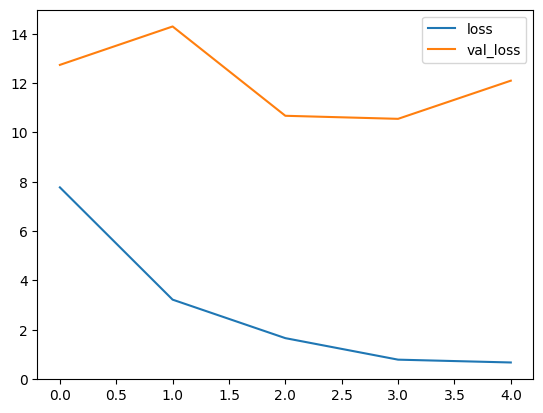

In [98]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

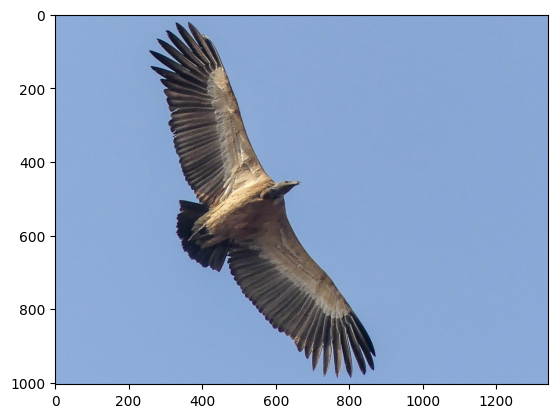

1/1 [==============================] - 1s 1s/step
Class: 0, Predicted_Bird: blasti


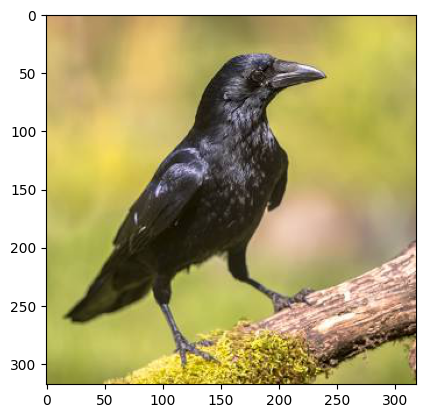

1/1 [==============================] - 0s 26ms/step
Class: 0, Predicted_Bird: blasti


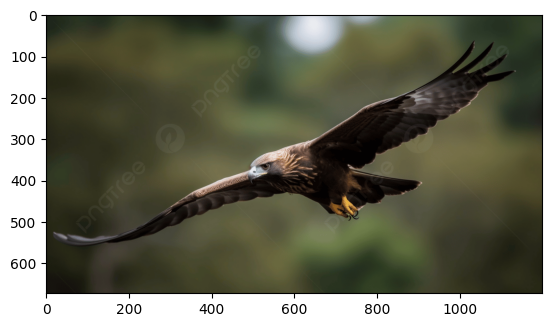

1/1 [==============================] - 0s 24ms/step
Class: 0, Predicted_Bird: blasti


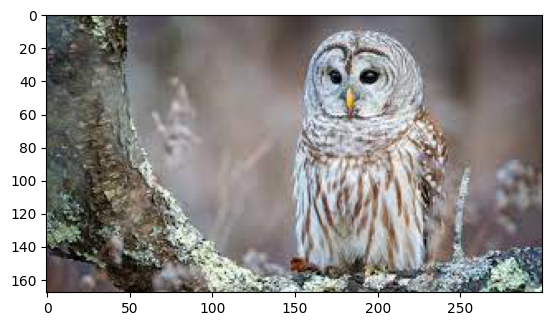

1/1 [==============================] - 0s 35ms/step
Class: 0, Predicted_Bird: blasti


In [97]:
# Testing 1
image1 = mpimg.imread('/content/himgriBird.jpeg')
plt.imshow(image1)
plt.show()
img1 = image.load_img('/content/himgriBird.jpeg', target_size=(224, 224));
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1, axis=0)
pred1 = np.argmax(xception_model.predict(img1))
output = ['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(f'Class: {pred1}, Predicted_Bird: {output[pred1]}')
# Testing 2
image2 = mpimg.imread('/content/lbicrwBird.jpeg')
plt.imshow(image2)
plt.show()
img2 = image.load_img('/content/lbicrwBird.jpeg', target_size=(224, 224));
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis=0)
pred2 = np.argmax(xception_model.predict(img2))
print(f'Class: {pred2}, Predicted_Bird: {output[pred2]}')
# Testing 3
image3 = mpimg.imread('/content/boneglBird.jpg')
plt.imshow(image3)
plt.show()
img3 = image.load_img('/content/boneglBird.jpg', target_size=(224, 224));
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3, axis=0)
pred3 = np.argmax(xception_model.predict(img3))
print(f'Class: {pred3}, Predicted_Bird: {output[pred3]}')
# Testing 4
image4 = mpimg.imread('/content/jglowlBird.jpeg')
plt.imshow(image4)
plt.show()
img4 = image.load_img('/content/jglowlBird.jpeg', target_size=(224, 224));
img4 = image.img_to_array(img4)
img4 = np.expand_dims(img4, axis=0)
pred4 = np.argmax(xception_model.predict(img4))
print(f'Class: {pred4}, Predicted_Bird: {output[pred4]}')